#### Importing required Libraries.

In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import confusion_matrix

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Input,Embedding,Dense,Flatten,concatenate
from keras.models import Model
from sklearn.metrics import f1_score
import nltk
from nltk import word_tokenize
import re
import spacy
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Web scraping by using Request

In [359]:
#import requests
#df1=pd.DataFrame()
#headers = {
    'Referer': 'https://www.rottentomatoes.com/m/the_lion_king_2019/reviews?type=user',
    'User-Agent': 'Chrome/74.0.3729.108',
    'X-Requested-With': 'XMLHttpRequest',
#}

#url = 'https://www.rottentomatoes.com/napi/movie/9057c2cf-7cab-317f-876f-e50b245ca76e/reviews/user'

#payload = {
    'direction': 'next',
    'endCursor': '',
    'startCursor': '',
#}

#sess = requests.Session()

#i=0

#while i<300:
   # r = sess.get(url, headers=headers, params=payload)
    #data = r.json()

    #if not data['pageInfo']['hasNextPage']:
        #break
    #payload['endCursor'] = data['pageInfo']['endCursor']
    #payload['startCursor'] = data['pageInfo']['startCursor']
        
    #df=pd.DataFrame.from_dict(data['reviews'], orient='columns')
    #df1=df1.append(df, ignore_index=True)
    #i=i+1
    #time.sleep(5)

IndentationError: unexpected indent (<ipython-input-359-101317dc4ea7>, line 4)

## Importing the data

In [114]:
data=pd.read_csv("Text.csv", header=0, sep=',')
data.head()

,Unnamed: 0,createDate,displayImageUrl,displayName,hasProfanity,hasSpoilers,isSuperReviewer,isVerified,rating,review,score,timeFromCreation,updateDate,user
0,0,2019-08-19T09:35:03.174Z,NaN,kara,False,False,False,True,STAR_5,"Amazing! Music , animals, scenery!",5.0,15m ago,2019-08-19T09:35:03.174Z,{'userId': '04c1f858-a9b2-4ceb-befb-8a32d168af...
1,1,2019-08-19T09:32:29.179Z,NaN,Octa Z,False,False,False,False,STAR_1_5,I don't even know why the director was needed ...,1.5,17m ago,2019-08-19T09:32:29.179Z,"{'userId': '978204858', 'realm': 'RT', 'displa..."
2,2,2019-08-19T09:11:38.339Z,NaN,Nancy B,False,False,False,True,STAR_5,The graphics were amazing. The story was just ...,5.0,38m ago,2019-08-19T09:11:38.339Z,{'userId': '747297bd-5ef5-4b05-8a70-ebdb6e8209...
3,3,2019-08-19T08:44:42.582Z,NaN,Rose S,False,False,False,True,STAR_5,A beautifully done movie! Loved it!,5.0,1h ago,2019-08-19T08:44:42.582Z,{'userId': '96F00C05-83F7-43D1-B2A0-C7F5C8361C...
4,4,2019-08-19T08:04:27.267Z,NaN,mom,False,False,False,True,STAR_5,Pretty good. Really enjoyed closed caption so ...,5.0,2h ago,2019-08-19T08:04:27.267Z,{'userId': 'A2A39790-5E98-421B-8B12-BD23517085...


##  Undestanding the data

In [115]:
import os
sh=os.getcwd()
sh

'C:\\Users\\aniru\\Downloads'

In [116]:
data.shape # Checking rows and Columns

(3000, 14)

In [117]:
data.columns # Checking Columns

Index(['Unnamed: 0', 'createDate', 'displayImageUrl', 'displayName',
       'hasProfanity', 'hasSpoilers', 'isSuperReviewer', 'isVerified',
       'rating', 'review', 'score', 'timeFromCreation', 'updateDate', 'user'],
      dtype='object')

#### Remove the column Unnamed:0 since it has sequence of unique numbers

In [118]:
data=data.drop('Unnamed: 0', axis=1) # Dropping the unwanted column.

In [119]:
data.index

RangeIndex(start=0, stop=3000, step=1)

In [120]:
data.columns

Index(['createDate', 'displayImageUrl', 'displayName', 'hasProfanity',
       'hasSpoilers', 'isSuperReviewer', 'isVerified', 'rating', 'review',
       'score', 'timeFromCreation', 'updateDate', 'user'],
      dtype='object')

### Get the unique levels in User

In [121]:
data_1=  np.size(np.unique(data['user'], return_counts=True)[0])# Unique values of user.

In [122]:
data_1

3000

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
createDate          3000 non-null object
displayImageUrl     226 non-null object
displayName         2858 non-null object
hasProfanity        3000 non-null bool
hasSpoilers         3000 non-null bool
isSuperReviewer     3000 non-null bool
isVerified          3000 non-null bool
rating              3000 non-null object
review              3000 non-null object
score               3000 non-null float64
timeFromCreation    3000 non-null object
updateDate          3000 non-null object
user                3000 non-null object
dtypes: bool(4), float64(1), object(8)
memory usage: 222.7+ KB


In [124]:
data.isnull().sum()

createDate             0
displayImageUrl     2774
displayName          142
hasProfanity           0
hasSpoilers            0
isSuperReviewer        0
isVerified             0
rating                 0
review                 0
score                  0
timeFromCreation       0
updateDate             0
user                   0
dtype: int64

### Dropping the null values

In [125]:
data=data.dropna(axis=1)  ##Removing null values

In [126]:
data.dtypes

createDate           object
hasProfanity           bool
hasSpoilers            bool
isSuperReviewer        bool
isVerified             bool
rating               object
review               object
score               float64
timeFromCreation     object
updateDate           object
user                 object
dtype: object

### Defining a function

In [127]:
def scores(score):
    if score>3.0:
        return 0
    else: 
        return 1   ## Writing the function for scores

In [129]:
data['sentiment']= data.loc[:,'score'].apply(scores)
data['sentiment'].head()

0    0
1    1
2    0
3    0
4    0
Name: sentiment, dtype: int64

In [130]:
review_data=data['review']

### Using Regular expression for removing non-Letters 

In [133]:
letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(review_data))
letters_only[1:100]

'                      Amazing  Music   animals  scenery          I don t even know why the director'

In [134]:
tokens=word_tokenize(letters_only)
tokens[5]

'don'

In [135]:
 [w for w in tokens if re.search('ed$',w)]

['needed',
 'Loved',
 'enjoyed',
 'closed',
 'loved',
 'enjoyed',
 'Loved',
 'loved',
 'stayed',
 'Loved',
 'enjoyed',
 'need',
 'uninspired',
 'expected',
 'loved',
 'created',
 'loved',
 'lacked',
 'Loved',
 'animated',
 'animated',
 'Mixed',
 'loved',
 'enjoyed',
 'wanted',
 'loved']

In [136]:
[w for w in tokens if re.search('[mno][def][ijk]', w)]

['grandkids']

In [137]:
nlp = spacy.load('en_core_web_sm')

In [138]:
doc=nlp(letters_only)

In [139]:
print('Index:   ', [token.i for token in doc])
print('Text:    ', [token.text for token in doc])
print('is_alpha:', [token.is_alpha for token in doc])
print('is_punct:', [token.is_punct for token in doc])
print('like_num:', [token.like_num for token in doc])

Index:    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

is_alpha: [False, True, False, True, False, True, False, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True, False, True, True, False, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, False, True, True, True, False, True, False, True, True, True, False, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, False, True, False, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, False, True, False, True, True, False, True, True, True, True, False, True, True, False, True, True, True, False, True, True, True, True, 

### Lemmatization

In [140]:
print([(w.text, w.lemma_) for w in doc]) 

[('                       ', '                       '), ('Amazing', 'Amazing'), (' ', ' '), ('Music', 'Music'), ('  ', '  '), ('animals', 'animal'), (' ', ' '), ('scenery', 'scenery'), ('         ', '         '), ('I', '-PRON-'), ('don', 'don'), ('t', 't'), ('even', 'even'), ('know', 'know'), ('why', 'why'), ('the', 'the'), ('director', 'director'), ('was', 'be'), ('needed', 'need'), ('            ', '            '), ('The', 'the'), ('graphics', 'graphic'), ('were', 'be'), ('amazing', 'amazing'), (' ', ' '), ('The', 'the'), ('story', 'story'), ('was', 'be'), ('just', 'just'), ('                         ', '                         '), ('A', 'A'), ('beautifully', 'beautifully'), ('done', 'do'), ('movie', 'movie'), ('  ', '  '), ('Loved', 'love'), ('it', '-PRON-'), ('         ', '         '), ('Pretty', 'pretty'), ('good', 'good'), (' ', ' '), ('Really', 'really'), ('enjoyed', 'enjoy'), ('closed', 'closed'), ('caption', 'caption'), ('so', 'so'), ('            ', '            '), ('I', '

### Parts of speech of tagging

In [141]:
print([(w.text, w.pos_) for w in doc])

[('                       ', 'SPACE'), ('Amazing', 'PROPN'), (' ', 'SPACE'), ('Music', 'PROPN'), ('  ', 'SPACE'), ('animals', 'NOUN'), (' ', 'SPACE'), ('scenery', 'NOUN'), ('         ', 'SPACE'), ('I', 'PRON'), ('don', 'VERB'), ('t', 'PRON'), ('even', 'ADV'), ('know', 'VERB'), ('why', 'ADV'), ('the', 'DET'), ('director', 'NOUN'), ('was', 'VERB'), ('needed', 'VERB'), ('            ', 'SPACE'), ('The', 'DET'), ('graphics', 'NOUN'), ('were', 'VERB'), ('amazing', 'ADJ'), (' ', 'SPACE'), ('The', 'DET'), ('story', 'NOUN'), ('was', 'VERB'), ('just', 'ADV'), ('                         ', 'SPACE'), ('A', 'PROPN'), ('beautifully', 'ADV'), ('done', 'VERB'), ('movie', 'NOUN'), ('  ', 'SPACE'), ('Loved', 'VERB'), ('it', 'PRON'), ('         ', 'SPACE'), ('Pretty', 'ADV'), ('good', 'ADJ'), (' ', 'SPACE'), ('Really', 'ADV'), ('enjoyed', 'VERB'), ('closed', 'ADJ'), ('caption', 'NOUN'), ('so', 'ADV'), ('            ', 'SPACE'), ('I', 'PRON'), ('love', 'VERB'), ('everything', 'NOUN'), (' ', 'SPACE'), ('I

### Bi-Grams

In [142]:
tmp=0

for i in nltk.ngrams(tokens,2):
    print(i,)
    tmp += 1
print(tmp)  

('Amazing', 'Music')
('Music', 'animals')
('animals', 'scenery')
('scenery', 'I')
('I', 'don')
('don', 't')
('t', 'even')
('even', 'know')
('know', 'why')
('why', 'the')
('the', 'director')
('director', 'was')
('was', 'needed')
('needed', 'The')
('The', 'graphics')
('graphics', 'were')
('were', 'amazing')
('amazing', 'The')
('The', 'story')
('story', 'was')
('was', 'just')
('just', 'A')
('A', 'beautifully')
('beautifully', 'done')
('done', 'movie')
('movie', 'Loved')
('Loved', 'it')
('it', 'Pretty')
('Pretty', 'good')
('good', 'Really')
('Really', 'enjoyed')
('enjoyed', 'closed')
('closed', 'caption')
('caption', 'so')
('so', 'I')
('I', 'love')
('love', 'everything')
('everything', 'I')
('I', 'm')
('m', 'glad')
('glad', 'they')
('they', 'kept')
('kept', 'to')
('to', 'the')
('the', 'o')
('o', 'Great')
('Great', 'film')
('film', 'loved')
('loved', 'it')
('it', 'It')
('It', 'only')
('only', 'gets')
('gets', 'two')
('two', 'stars')
('stars', 'rather')
('rather', 'than')
('than', 'one')
('o

In [143]:
%matplotlib inline

## Plots

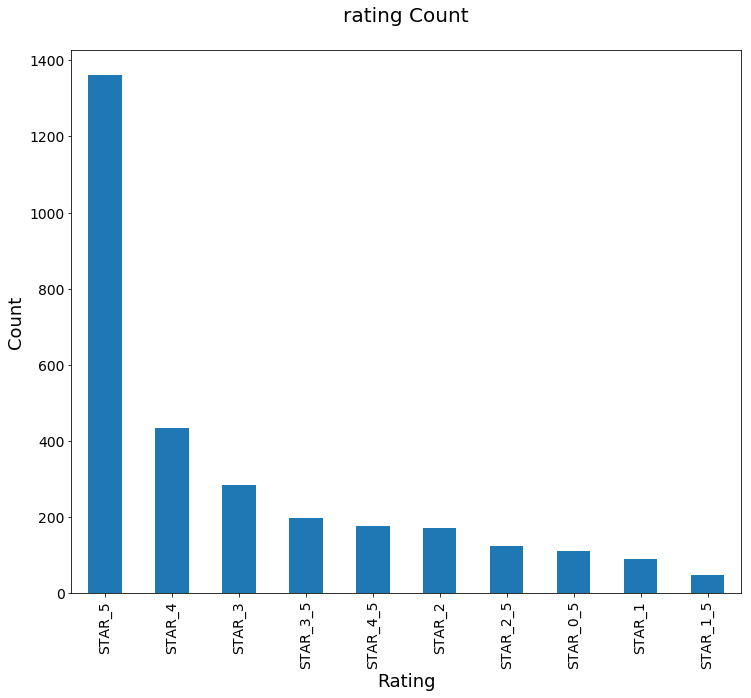

In [144]:
ax = data['rating'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('rating Count\n', fontsize=20)
ax.set_xlabel('Rating', fontsize=18)
ax.set_ylabel('Count', fontsize=18);

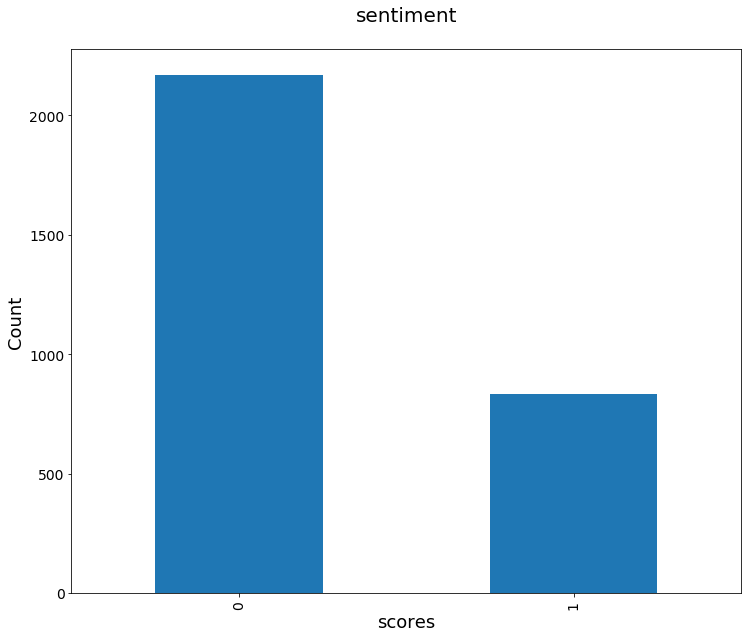

In [40]:
ax = data['sentiment'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('sentiment\n', fontsize=20)
ax.set_xlabel('scores', fontsize=18)
ax.set_ylabel('Count', fontsize=18);

### Counting values of rating

In [145]:
data['rating'].value_counts()

STAR_5      1360
STAR_4       435
STAR_3       285
STAR_3_5     197
STAR_4_5     176
STAR_2       172
STAR_2_5     124
STAR_0_5     112
STAR_1        90
STAR_1_5      49
Name: rating, dtype: int64

### To check whether each review is small or big reviews by keeping 1000 words as a threshold

In [146]:
for i in data['review']:
    df1=pd.DataFrame()
    if len(data['review'])<1000 :
        print("This is a  Small Review")
    else:
            print(" This is a large Review")
            df=pd.DataFrame(data['review'])
            df1=df1.append(df)

 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large

 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large

 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large

 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large

 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large Review
 This is a large

In [147]:
data.columns

Index(['createDate', 'hasProfanity', 'hasSpoilers', 'isSuperReviewer',
       'isVerified', 'rating', 'review', 'score', 'timeFromCreation',
       'updateDate', 'user', 'sentiment'],
      dtype='object')

### Change the dtypes accordingly

In [148]:
categorical=['hasProfanity','hasSpoilers','isSuperReviewer','isVerified','user','sentiment']
string=['review']

In [149]:
for cat in categorical:
    data[cat] = data[cat].astype('category')

In [150]:
data.describe(include='all')

,createDate,hasProfanity,hasSpoilers,isSuperReviewer,isVerified,rating,review,score,timeFromCreation,updateDate,user,sentiment
count,3000,3000,3000,3000,3000,3000,3000,3000.000000,3000,3000,3000,3000.0
unique,3000,2,2,2,2,10,2995,NaN,43,3000,3000,2.0
top,2019-08-03T22:29:15.725Z,False,False,False,True,STAR_5,Absolutely loved it!,NaN,"Aug 05, 2019",2019-08-03T22:29:15.725Z,{'userId': 'ffebf120-9791-48c6-b105-02b9ce4355...,0.0
freq,1,2969,2998,2999,2160,1360,2,NaN,318,1,1,2168.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.916667,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.313315,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
createDate          3000 non-null object
hasProfanity        3000 non-null category
hasSpoilers         3000 non-null category
isSuperReviewer     3000 non-null category
isVerified          3000 non-null category
rating              3000 non-null object
review              3000 non-null object
score               3000 non-null float64
timeFromCreation    3000 non-null object
updateDate          3000 non-null object
user                3000 non-null category
sentiment           3000 non-null category
dtypes: category(6), float64(1), object(5)
memory usage: 265.1+ KB


In [152]:
data.isnull().sum()

createDate          0
hasProfanity        0
hasSpoilers         0
isSuperReviewer     0
isVerified          0
rating              0
review              0
score               0
timeFromCreation    0
updateDate          0
user                0
sentiment           0
dtype: int64

In [153]:
clothing_ID_levels = np.size(np.unique(data['user'], return_counts=True)[0])## Finding unique values
clothing_ID_levels

3000

In [154]:
data=data.drop('user', axis=1)## Dropping user column

In [155]:
data.columns

Index(['createDate', 'hasProfanity', 'hasSpoilers', 'isSuperReviewer',
       'isVerified', 'rating', 'review', 'score', 'timeFromCreation',
       'updateDate', 'sentiment'],
      dtype='object')

### Dropping the score and rating 

In [156]:
data=data.drop(['score','rating'], axis=1)

In [157]:
data.columns

Index(['createDate', 'hasProfanity', 'hasSpoilers', 'isSuperReviewer',
       'isVerified', 'review', 'timeFromCreation', 'updateDate', 'sentiment'],
      dtype='object')

### Remove sentiment  data for further processing

In [158]:
categorical_attr = data.select_dtypes('category').columns
categorical_attr = categorical_attr.drop(['sentiment'])
categorical_attr 

Index(['hasProfanity', 'hasSpoilers', 'isSuperReviewer', 'isVerified'], dtype='object')

In [159]:
target_attr=['sentiment']##Target Attribute

## Train Test Split

In [160]:
data_categorical_train, data_categorical_test, \
data_string_train, data_string_test, \
Y_train, Y_test = train_test_split(data[categorical_attr],
                                   data[string],
                                    data[target_attr],
                                   test_size=0.33, random_state=678)

### Preprocessing of categorical variables

In [161]:
onehotencoder = OneHotEncoder(handle_unknown='ignore') ## One Hot Encoding

In [162]:
OneHotEncoder = onehotencoder.fit(data_categorical_train)

In [163]:
OneHotEncoder_train = OneHotEncoder.transform(data_categorical_train).toarray()
OneHotEncoder_test = OneHotEncoder.transform(data_categorical_test).toarray()

In [164]:
OneHotEncoder_test.shape

(990, 8)

### Checking Unique values of sentiment

In [165]:
data['sentiment'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [166]:
no_of_levels=len(data['sentiment'].unique())

In [167]:
no_of_levels

2

In [168]:
from sklearn.preprocessing import OneHotEncoder

In [169]:
onehotencoder = OneHotEncoder(handle_unknown='ignore')

In [170]:
OneHotEncoder = onehotencoder.fit(Y_train.values.reshape(-1, 1))

In [171]:
OneHotEncoder_target_train = OneHotEncoder.transform(Y_train.values.reshape(-1, 1)).toarray()
OneHotEncoder_target_test = OneHotEncoder.transform(Y_test.values.reshape(-1, 1)).toarray()

In [172]:
OneHotEncoder_target_test.shape

(990, 2)

### Pre-Processing of Text

### Preprocessing of Review

In [173]:
unique_elements, counts_elements = np.unique(data_string_train['review'].apply(len),return_counts=True)

In [184]:
unique_elements[1:10] ## Taking unique element in review

array([19, 20, 21, 22, 23, 24, 25, 26, 27], dtype=int64)

In [185]:
counts_elements[1:10] ## Counting the element in review text

array([ 1, 14, 23, 23, 19, 19, 21, 17, 23], dtype=int64)

#### Max length in Review Text is 44

In [176]:
max_text_count_length = list(counts_elements).index(max(counts_elements))
REVIEW_TEXT_MAX_SEQUENCE_LENGTH = unique_elements[max_text_count_length]
REVIEW_TEXT_MAX_SEQUENCE_LENGTH

44

### Tokenizing the words

In [177]:
tokenizer = Tokenizer(oov_token='None')
tokenizer.fit_on_texts(data_string_train['review'])
review_text_train = tokenizer.texts_to_sequences(data_string_train['review'])
review_text_test = tokenizer.texts_to_sequences(data_string_test['review'])

word_index_review_text = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index_review_text))
NUM_WORDS_REVIEW_TEXT = len(word_index_review_text)+1

review_text_seq_train = pad_sequences(review_text_train, maxlen=300)
review_text_seq_test = pad_sequences(review_text_test, maxlen=300)

Found 4137 unique tokens.


### Loading the glove vector into the memory 

In [178]:
embeddings_index = dict()
f = open('glove.6B.50d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


#### We are creating a weight matrix for words which are in traning data.and by taking unique words from tokenizer.index and locating the weight matrix from the loaded Glove embedding.

#### Matrix of words will see during training.

#### Count number of words not in Glove.

In [179]:
review_embedding_matrix = np.zeros((NUM_WORDS_REVIEW_TEXT,50))
review_word_not_in_glove_count = 0
review_word_not_in_glove =[]
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        review_embedding_matrix[i] = embedding_vector
    else:
        review_word_not_in_glove.append(word)
        review_word_not_in_glove_count = review_word_not_in_glove_count+1

In [180]:
print(review_embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.41800001  0.24968    -0.41242    ... -0.18411    -0.11514
  -0.78580999]
 ...
 [-0.2696      0.56095999  0.24563999 ... -0.45278999  0.96208
   0.4235    ]
 [ 0.1034      0.76203001 -0.37841001 ...  0.59477001 -0.0042276
   0.27583   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [187]:
print(review_word_not_in_glove[1:10])

["it's", "didn't", 'pumba', "don't", 'didn’t', "can't", 'it’s', "wasn't", "i'm"]


In [182]:
print(review_word_not_in_glove_count)

393


#### Embedding Layer for Review

In [188]:
review_text_input= Input(shape=(300,),name='review_text_input')
if (review_word_not_in_glove_count<=1):
    text_embed = Embedding(input_dim=NUM_WORDS_REVIEW_TEXT,output_dim=50,weights=[review_embedding_matrix],trainable=False)(review_text_input)
else:
    text_embed = Embedding(input_dim=NUM_WORDS_REVIEW_TEXT,output_dim=50,weights=[review_embedding_matrix],trainable=True)(review_text_input)
review_out_text = Flatten()(text_embed)
X = Dense(8, activation='relu')(review_out_text)
X=Dense(1, activation='relu')(X)
final_out = Dense(no_of_levels, activation='softmax')(X)

W0830 07:36:27.972366 13588 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0830 07:36:28.854873 13588 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0830 07:36:28.859516 13588 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0830 07:36:28.940144 13588 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0830 07:36:28.944332 13588 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\backend\ten

In [189]:
model = Model(inputs=[review_text_input], outputs=final_out) #Model Building

In [190]:
model.summary() #Checking how many weights are taken by each layer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
review_text_input (InputLaye (None, 300)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 300, 50)           206900    
_________________________________________________________________
flatten_1 (Flatten)          (None, 15000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 120008    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 4         
Total params: 326,921
Trainable params: 326,921
Non-trainable params: 0
_________________________________________________________________


### Back Propagation Phase

In [191]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

W0830 07:36:40.367577 13588 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0830 07:36:40.383107 13588 deprecation.py:323] From D:\Anaconda\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [192]:
model.fit([review_text_seq_train],y=OneHotEncoder_target_train,epochs=50,batch_size=32, validation_split=0.3)

Train on 1407 samples, validate on 603 samples
Epoch 1/50
1407/1407 [==============================] - ETA: 49s - loss: 0.7090 - acc: 0.31 - ETA: 9s - loss: 0.6954 - acc: 0.5375 - ETA: 2s - loss: 0.6892 - acc: 0.656 - ETA: 1s - loss: 0.6848 - acc: 0.678 - ETA: 0s - loss: 0.6811 - acc: 0.694 - ETA: 0s - loss: 0.6749 - acc: 0.714 - 2s 1ms/step - loss: 0.6751 - acc: 0.7029 - val_loss: 0.6600 - val_acc: 0.7148
Epoch 2/50
1407/1407 [==============================] - ETA: 0s - loss: 0.6593 - acc: 0.718 - ETA: 0s - loss: 0.6540 - acc: 0.734 - ETA: 0s - loss: 0.6491 - acc: 0.743 - ETA: 0s - loss: 0.6470 - acc: 0.738 - ETA: 0s - loss: 0.6469 - acc: 0.730 - ETA: 0s - loss: 0.6454 - acc: 0.728 - 0s 222us/step - loss: 0.6451 - acc: 0.7292 - val_loss: 0.6387 - val_acc: 0.7131
Epoch 3/50
1407/1407 [==============================] - ETA: 0s - loss: 0.6349 - acc: 0.718 - ETA: 0s - loss: 0.6442 - acc: 0.684 - ETA: 0s - loss: 0.6376 - acc: 0.703 - ETA: 0s - loss: 0.6321 - acc: 0.713 - ETA: 0s - loss: 0.

1407/1407 [==============================] - ETA: 0s - loss: 0.1466 - acc: 0.968 - ETA: 0s - loss: 0.1786 - acc: 0.950 - ETA: 0s - loss: 0.1778 - acc: 0.951 - ETA: 0s - loss: 0.1876 - acc: 0.947 - ETA: 0s - loss: 0.1887 - acc: 0.947 - 0s 199us/step - loss: 0.1927 - acc: 0.9453 - val_loss: 0.8226 - val_acc: 0.6716
Epoch 47/50
1407/1407 [==============================] - ETA: 0s - loss: 0.2020 - acc: 0.968 - ETA: 0s - loss: 0.1802 - acc: 0.960 - ETA: 0s - loss: 0.1742 - acc: 0.960 - ETA: 0s - loss: 0.1831 - acc: 0.957 - ETA: 0s - loss: 0.1991 - acc: 0.946 - 0s 201us/step - loss: 0.1990 - acc: 0.9460 - val_loss: 0.7156 - val_acc: 0.7081
Epoch 48/50
1407/1407 [==============================] - ETA: 0s - loss: 0.1443 - acc: 0.937 - ETA: 0s - loss: 0.1679 - acc: 0.954 - ETA: 0s - loss: 0.1815 - acc: 0.951 - ETA: 0s - loss: 0.1851 - acc: 0.953 - ETA: 0s - loss: 0.1950 - acc: 0.946 - ETA: 0s - loss: 0.2026 - acc: 0.941 - 0s 216us/step - loss: 0.1989 - acc: 0.9431 - val_loss: 0.7475 - val_acc: 

### Checking Loss and Accuracy

In [193]:
model.evaluate([review_text_seq_train,], y=OneHotEncoder_target_train)

2010/2010 [==============================] - ETA:  - ETA:  - ETA:  - 0s 59us/step


[0.3253842004496067, 0.8910447762973273]

### Predicting on Train-Data

In [194]:
pred=model.predict([review_text_seq_train])

In [195]:
pred

array([[0.04782518, 0.95217484],
       [0.5831308 , 0.41686922],
       [0.9212415 , 0.07875841],
       ...,
       [0.9212415 , 0.07875841],
       [0.92124164, 0.07875841],
       [0.9125791 , 0.08742085]], dtype=float32)

In [196]:
pred.shape

(2010, 2)

In [197]:
model.evaluate([review_text_seq_test],y=OneHotEncoder_target_test)

990/990 [==============================] - ETA:  - 0s 43us/step


[0.6937550234072136, 0.7212121216937749]

### Predicting on Test-Data

In [198]:
pred_test=model.predict(review_text_seq_test)

In [199]:
pred_test

array([[0.9212415 , 0.07875841],
       [0.9212415 , 0.07875841],
       [0.9212415 , 0.07875841],
       ...,
       [0.9212415 , 0.07875841],
       [0.8460576 , 0.15394238],
       [0.92124164, 0.07875841]], dtype=float32)

### Basically returning the index of the maximum value in the array

In [200]:
y_classes=pred.argmax(axis=-1)
y_classes

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [201]:
y_classes_test=pred_test.argmax(axis=-1)

### Confusion Matrix

In [202]:
confusion_matrix(Y_train,y_classes)

array([[1380,   55],
       [ 164,  411]], dtype=int64)

### F1_score

In [203]:
f1_score(Y_train,y_classes)

0.7896253602305475

In [204]:
f1_score(Y_test,y_classes_test)

0.3811659192825112

### Test-Data

In [205]:
import pandas as pd
import numpy as np

In [206]:
test_data=pd.read_csv("test-1566619745327.csv", header=0, sep=',', ) #importing test data

In [207]:
test_data.head()

,ReviewID,review
0,92876,Was good. Nothing like the original but I beli...
1,92877,I absolutely loved it! A wonderful rendition o...
2,92878,I love the movie! Good job director! \nI appre...
3,92879,"GREAT MOVIE!! Same as the original, but the c..."
4,92880,Realistic. Fantastic special effects


In [207]:
test_data.drop("ReviewID", axis=1, inplace=True)#drop review id

In [208]:
test_data.columns

Index(['ReviewID', 'review'], dtype='object')

In [209]:
test_data.isnull().sum()

ReviewID    0
review      0
dtype: int64

In [210]:
unique_elements, counts_elements = np.unique(test_data['review'].apply(len),return_counts=True)#finding unique and count elements

In [212]:
unique_elements[1:10]

array([21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)

In [213]:
counts_elements[1:10]

array([19,  5, 15, 12, 16, 15, 19,  8, 11], dtype=int64)

In [214]:
max_text_count_length = list(counts_elements).index(max(counts_elements))
REVIEW_TEXT_MAX_SEQUENCE_LENGTH = unique_elements[max_text_count_length]
REVIEW_TEXT_MAX_SEQUENCE_LENGTH# finding the length of the text in each sentences

45

In [215]:
tokenizer = Tokenizer(oov_token='None')
tokenizer.fit_on_texts(test_data['review'])
review_text_train = tokenizer.texts_to_sequences(test_data['review'])
review_text_test = tokenizer.texts_to_sequences(test_data['review'])

word_index_review_text = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index_review_text))
NUM_WORDS_REVIEW_TEXT = len(word_index_review_text)+1

review_text_seq_train = pad_sequences(review_text_train, maxlen=300)
review_text_seq_test = pad_sequences(review_text_test, maxlen=300)#Padding the words to be in uniform shape

Found 3162 unique tokens.


In [216]:
test_data_predict_train=model.predict(review_text_seq_train) #predict on test data

In [217]:
y_classes_train=test_data_predict_train.argmax(axis=-1)
y_classes_train #combining all into 1

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [219]:
test_data_predict_test=model.predict(review_text_seq_test) # preicting on test data

In [220]:
test_data_predict_test

array([[0.25397953, 0.7460205 ],
       [0.89995825, 0.10004181],
       [0.89995825, 0.10004181],
       ...,
       [0.8957758 , 0.10422416],
       [0.8222694 , 0.17773065],
       [0.26748428, 0.73251575]], dtype=float32)

In [221]:
y_classes=test_data_predict_test.argmax(axis=-1)
y_classes #combining all into 1

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [222]:
y_classes_train=test_data_predict_train.argmax(axis=-1)
y_classes_train

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [229]:
test_data['sentiment']=y_classes # Puttinig sentiment into test data

In [230]:
test_data.head()

,ReviewID,review,sentiment
0,92876,Was good. Nothing like the original but I beli...,1
1,92877,I absolutely loved it! A wonderful rendition o...,0
2,92878,I love the movie! Good job director! \nI appre...,0
3,92879,"GREAT MOVIE!! Same as the original, but the c...",0
4,92880,Realistic. Fantastic special effects,0


In [231]:
one=test_data.drop("review", axis=1, inplace=True)# dropping review column for further processing

In [232]:
test_data.head()

,ReviewID,sentiment
0,92876,1
1,92877,0
2,92878,0
3,92879,0
4,92880,0


In [164]:
two=pd.DataFrame(test_data).to_csv("three-submission.csv", index=False)

In [233]:
last=pd.DataFrame(test_data).to_csv("last-submission.csv", index=False)

# 2nd model

## Importing Libraries

In [218]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Plotting labelled data
from nltk.corpus import stopwords # dealing with stop words
from textblob import TextBlob # dealing with spelling correction
from textblob import Word # dealing with lemmatization
from sklearn.feature_extraction.text import TfidfVectorizer # leading with term frequency

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

In [219]:
train=pd.read_csv("Text.csv", header=0, sep=',')

In [220]:
test=pd.read_csv("test-1566619745327.csv", header=0, sep=',')

In [221]:
train.columns

Index(['Unnamed: 0', 'createDate', 'displayImageUrl', 'displayName',
       'hasProfanity', 'hasSpoilers', 'isSuperReviewer', 'isVerified',
       'rating', 'review', 'score', 'timeFromCreation', 'updateDate', 'user'],
      dtype='object')

In [49]:
train.drop(["Unnamed: 0",'displayImageUrl','hasProfanity','hasSpoilers','isSuperReviewer','isVerified','rating','timeFromCreation','updateDate'], axis=1, inplace=True)

In [50]:
train.head()

,createDate,displayName,review,score,user
0,2019-08-19T09:35:03.174Z,kara,"Amazing! Music , animals, scenery!",5.0,{'userId': '04c1f858-a9b2-4ceb-befb-8a32d168af...
1,2019-08-19T09:32:29.179Z,Octa Z,I don't even know why the director was needed ...,1.5,"{'userId': '978204858', 'realm': 'RT', 'displa..."
2,2019-08-19T09:11:38.339Z,Nancy B,The graphics were amazing. The story was just ...,5.0,{'userId': '747297bd-5ef5-4b05-8a70-ebdb6e8209...
3,2019-08-19T08:44:42.582Z,Rose S,A beautifully done movie! Loved it!,5.0,{'userId': '96F00C05-83F7-43D1-B2A0-C7F5C8361C...
4,2019-08-19T08:04:27.267Z,mom,Pretty good. Really enjoyed closed caption so ...,5.0,{'userId': 'A2A39790-5E98-421B-8B12-BD23517085...


In [51]:
train.drop(["createDate","displayName","user"], axis=1, inplace=True) #droping these columns

In [52]:
train['review']=train['review'].apply(lambda x: " ".join( x.lower() for x in x.split())) # lowering all the words 

In [53]:
train['review']=train['review'].str.replace("[^\W\S]"," ") #regular Expression

In [54]:
stop = stopwords.words('english')
train['review'] = train['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) # stopwords

In [55]:
TextBlob(train['review'][1]).words
TextBlob(test['review'][1]).words # Tokenization

WordList(['I', 'absolutely', 'loved', 'it', 'A', 'wonderful', 'rendition', 'of', 'the', 'original', 'Just', 'dont', 'compare', 'to', 'the', 'cartoon', 'version', 'Let', 'this', 'movie', 'be', 'its', 'own', 'and', 'you', 'will', 'like', 'it'])

In [61]:
tfidf = TfidfVectorizer(ngram_range=(1,2))
train_vect = tfidf.fit_transform(train['review'])
test_vect = tfidf.transform(test['review']) #applying Tfidf to reviews

In [56]:
def scores(score):
    if score>3.0:
        return 0
    else:
        return 1

In [57]:
train['sentiment']=train.loc[:,'score'].apply(scores) #sentiment

In [58]:
train.drop("score", axis=1, inplace=True)# dropping score

In [59]:
le=LabelEncoder()
y=le.fit_transform(train['sentiment'].values) #applying Label Encoder for sentiment

In [62]:
X_train, X_test, y_train, y_test=train_test_split(train_vect, y, train_size=0.75)# train-Test-split

## Logistic Regression

In [63]:
lr = LogisticRegression(random_state=0)

In [64]:
lr.fit(X_train, y_train)#Train-Data
predictions_lr = lr.predict(X_test) # Validation-Data

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
f1_score(y_test,predictions_lr)

0.2578125

In [66]:
pred_test=lr.predict(test_vect)#Test-Data

## Linear Support Vector Classifier

In [67]:
lsv = LinearSVC()

In [68]:
lsv.fit(X_train, y_train)#Train-Data

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [69]:
predictions_lr = lsv.predict(X_test)#Validation-Data

In [70]:
f1_score(y_test,predictions_lr)

0.6480446927374302

In [71]:
pred_test=lsv.predict(test_vect)# Test-Data

## Decision Tree

In [222]:
train=pd.read_csv("Text.csv", header=0, sep=',')

In [77]:
train.drop(["Unnamed: 0",'displayImageUrl','rating','timeFromCreation','updateDate',], axis=1, inplace=True)#dropping these columns

In [78]:
train.drop(['createDate','displayName','user'], axis=1, inplace=True)

In [79]:
train.head()

,hasProfanity,hasSpoilers,isSuperReviewer,isVerified,review,score
0,False,False,False,True,"Amazing! Music , animals, scenery!",5.0
1,False,False,False,False,I don't even know why the director was needed ...,1.5
2,False,False,False,True,The graphics were amazing. The story was just ...,5.0
3,False,False,False,True,A beautifully done movie! Loved it!,5.0
4,False,False,False,True,Pretty good. Really enjoyed closed caption so ...,5.0


In [80]:
for col in ["hasProfanity",'hasSpoilers','isSuperReviewer','isVerified']:
    train[col]:train[col].astype("category") # converting cat columns into there respective dtypes

In [81]:
categorical_Attributes = train.select_dtypes(include=['category']).columns

In [82]:
train['review']=train['review'].apply(lambda x: " ".join( x.lower() for x in x.split())) #converting words into lower case

In [83]:
train['review']=train['review'].str.replace("[^\W\S]"," ")# regular Expression

In [84]:
stop = stopwords.words('english')
train['review'] = train['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) # stopwords

In [85]:
TextBlob(train['review'][1]).words

WordList(['even', 'know', 'director', 'needed', 'here', 'characters', 'express', 'emotions', 'all', 'scene', 'copied', 'ruined', 'everything', 'disgrace'])

In [86]:
tfidf = TfidfVectorizer(ngram_range=(1,2))
train_vect = tfidf.fit_transform(train['review'])#Tfidf

In [87]:
def scores(score):
    if score>3.0:
        return 0
    else:
        return 1

In [88]:
train['sentiment']=train.loc[:,'score'].apply(scores)#Sentiment

In [89]:
train.drop("score", axis=1, inplace=True)

In [90]:
le=LabelEncoder()
y=le.fit_transform(train['sentiment'].values) #Label Encoder for sentiment

In [91]:
X_train, X_test, y_train, y_test=train_test_split(train_vect, y, train_size=0.6) #Train-Test-split

In [93]:
clf= tree.DecisionTreeClassifier(max_depth=4)
clf= clf.fit(X_train, y_train) #Decision tree Classifer  with tree depth=4

In [94]:
pred_train_tree=clf.predict(X_train)# Train-Data

In [95]:
pred_test_tree=clf.predict(X_test)#Validation-Data

In [98]:
f1_score(y_test, pred_test_tree)

0.19892473118279572

In [97]:
test=pd.read_csv("test-1566619745327.csv", header=0, sep=',')#test-Data

In [99]:
TextBlob(test['review'][1]).words

WordList(['I', 'absolutely', 'loved', 'it', 'A', 'wonderful', 'rendition', 'of', 'the', 'original', 'Just', 'dont', 'compare', 'to', 'the', 'cartoon', 'version', 'Let', 'this', 'movie', 'be', 'its', 'own', 'and', 'you', 'will', 'like', 'it'])

In [100]:
test['review'] = test['review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))# Lammatization

In [101]:
test_tree=clf.predict(test_vect)

## Random Forest

In [103]:
rfc = RandomForestClassifier(n_estimators=30,verbose=1)#Random Forest

In [104]:
rfc.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=1, warm_start=False)

In [105]:
pred_test_tree=rfc.predict(X_test)# Applying on Validation data

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


In [106]:
f1_score(y_test,pred_test_tree)

0.3291139240506329

In [107]:
random_forest_test=rfc.predict(test_vect)# Test-Data

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


## Clustering

In [109]:
k=range(1,9)
for k in k:
    model=KNeighborsClassifier(n_neighbors=k,weights='uniform',p=2)
    model.fit(X_train, y_train) #Selecting the best nearest neighbors

In [110]:
clustering_train=model.predict(X_train) #Applying on train data

In [111]:
clustering_test=model.predict(X_test)# Applying on Validation data

In [112]:
f1_score(y_test, clustering_test)

0.3543123543123543

In [113]:
model.test=model.predict(test_vect)# Test-Data

## F1-Scores of all the models


### Model Building                                                                                          F1-Score
#### Neural Network with Embedding layer                                                                          -- 0.38
#### Logistic Regression                                                                                                        -- 0.25
#### Linear support Vector Classifier                                                                                    -- 0.64
#### Decision Tree Classifier                                                                                                  -- 0.19
#### Random Forest                                                                                                                 -- 0.32
#### Clustering                                                                                                                         -- 0.35